In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import re
import pandas as pd

from utils import read_list, normal_distribution, get_scatter_plot, normalize, inverse_distances, normed_dists_to_sims

# Metrics for novelty and diversity

- Jaccard similarity metric
- Levenshtein distance metric - Transformed to similarity
- Word Mover's Distance metric - Transformed to similarity

## Jaccard similarity metric

Jaccard similarity does not need to normalised like the other metrics seen later

In [2]:
# # # Initial jaccard similarities
# jac_real_diversities = read_list('analysis_jaccard/jaccard_diversities_real.txt')
# jac_real_novelties = read_list('analysis_jaccard/jaccard_novelties_real.txt')

# jac_fake_diversities = read_list('analysis_jaccard/jaccard_diversities_fake3.txt')
# jac_fake_novelties = read_list('analysis_jaccard/jaccard_novelties_fake3.txt')

# # jac_fake_diversities = read_list('extra/jaccard_diversities_fake2.txt')
# # jac_fake_novelties = read_list('extra/jaccard_novelties_fake2_10.txt')

# # Transform distances to similarities
# jac_real_diversities = normed_dists_to_sims(normalize(jac_real_diversities))
# jac_real_novelties = normed_dists_to_sims(normalize(jac_real_novelties))
# jac_fake_diversities = normed_dists_to_sims(normalize(jac_fake_diversities))
# jac_fake_novelties = normed_dists_to_sims(normalize(jac_fake_novelties))

# assert(len(jac_real_diversities) == len(jac_real_novelties))
# assert(len(jac_fake_diversities) == len(jac_fake_diversities))


METRIC = "jaccard"

labelled_real=f'analysis_jaccard/{METRIC}_labelled_real_text.csv'
labelled_fake=f'analysis_jaccard/{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

jac_real_diversities = real_data['diversity'].values
jac_real_novelties = real_data['novelty'].values
jac_fake_diversities = fake_data['diversity'].values
jac_fake_novelties = fake_data['novelty'].values

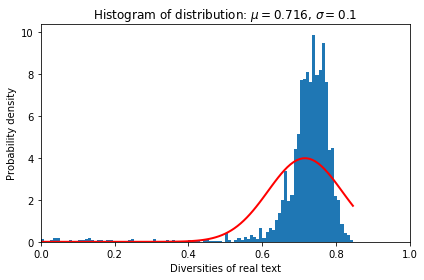

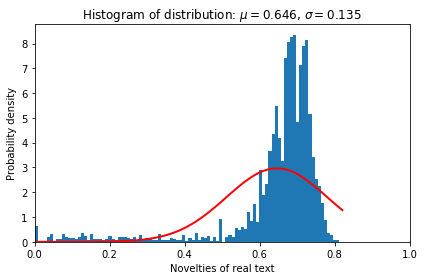

In [3]:
normal_distribution(jac_real_diversities, 'Diversities of real text')
normal_distribution(jac_real_novelties, 'Novelties of real text')

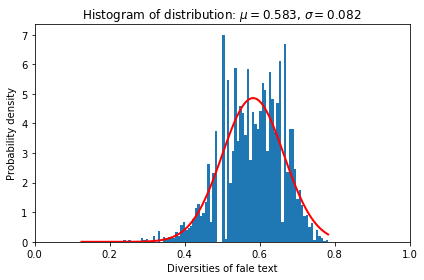

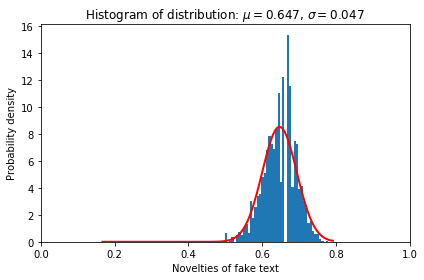

In [4]:
normal_distribution(jac_fake_diversities, 'Diversities of fale text')
normal_distribution(jac_fake_novelties, 'Novelties of fake text')

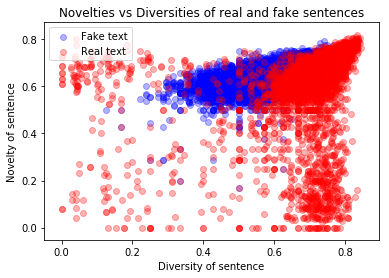

In [5]:
get_scatter_plot(jac_fake_diversities, jac_fake_novelties, jac_real_diversities, jac_real_novelties)

## Levenshtein distance metric

Levenshtein distance needs to normalised

In [6]:
# # Read the metrics results from the file
# lev_real_diversities_distances = read_list('analysis_levenshtein/levenshtein_diversities_real.txt')
# lev_real_novelties_distances = read_list('analysis_levenshtein/levenshtein_novelties_real.txt')
# lev_fake_diversities_distances = read_list('analysis_levenshtein/levenshtein_diversities_fake2.txt')
# lev_fake_novelties_distances = read_list('analysis_levenshtein/levenshtein_novelties_fake2.txt')

# def normed_dists_to_simss(dists):
#     return [1 - dist for dist in dists]

# def scale(dists):
#     return [dist/max(dists) for dist in dists]


# # Transform distances to similarities
# lev_normed_real_diversities = scale(lev_real_diversities_distances)
# lev_normed_real_novelties = scale(lev_real_novelties_distances)
# lev_normed_fake_diversities = scale(normed_dists_to_simss(lev_fake_diversities_distances))
# lev_normed_fake_novelties = scale(normed_dists_to_simss(lev_fake_novelties_distances))


# lev_normed_real_diversities = read_list('analysis_levenshtein/levenshtein_diversities_real.txt')
# lev_normed_real_novelties = read_list('analysis_levenshtein/levenshtein_novelties_real.txt')
# lev_normed_fake_diversities = read_list('analysis_levenshtein/levenshtein_diversities_fake2.txt')
# lev_normed_fake_novelties = read_list('analysis_levenshtein/levenshtein_novelties_fake2.txt')


# def re_normalize(dists):
# #     max_dist = max(dists)
# #     return [dist/max_dist for dist in dists]
#     return dists

# # # 
# Transform distances to similarities
# lev_normed_real_diversities = re_normalize(lev_real_diversities_distances)
# lev_normed_real_novelties = re_normalize(lev_real_novelties_distances)
# lev_normed_fake_diversities = re_normalize(normed_dists_to_simss(lev_fake_diversities_distances))
# lev_normed_fake_novelties = re_normalize(normed_dists_to_simss(lev_fake_novelties_distances))


METRIC = "levenshtein"

labelled_real=f'analysis_levenshtein/{METRIC}_labelled_real_text.csv'
labelled_fake=f'analysis_levenshtein/{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

lev_normed_real_diversities = real_data['diversity'].values
lev_normed_real_novelties = real_data['novelty'].values
lev_normed_fake_diversities = fake_data['diversity'].values
lev_normed_fake_novelties = fake_data['novelty'].values

In [7]:
# normal_distribution(lev_normed_real_diversities, "")
# normal_distribution(lev_real_novelties_distances,'')
# normal_distribution(lev_fake_diversities_distances,'')
# normal_distribution(lev_fake_novelties_distances,'')

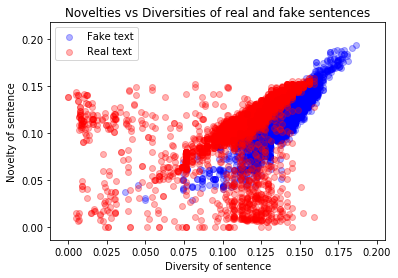

In [8]:
get_scatter_plot(lev_normed_fake_diversities, lev_normed_fake_novelties, lev_normed_real_diversities, lev_normed_real_novelties)

## Word Mover's Distance metric

Word Mover's Distance needs to normalised

In [9]:
# # Read the metrics results from the file
# wmd_real_diversities_distances = read_list('analysis_word_emb/wmd_diversities_real.txt')
# wmd_real_novelties_distances = read_list('analysis_word_emb/wmd_novelties_real.txt')
# wmd_fake_diversities_distances = read_list('analysis_word_emb/wmd_diversities_fake2.txt')
# wmd_fake_novelties_distances = read_list('analysis_word_emb/wmd_novelties_fake2.txt')


# # wmd_normed_real_diversities = read_list('analysis_word_emb/wmd_diversities_real.txt')
# # wmd_normed_real_novelties = read_list('analysis_word_emb/wmd_novelties_real.txt')
# # wmd_normed_fake_diversities = read_list('analysis_word_emb/wmd_diversities_fake2.txt')
# # wmd_normed_fake_novelties = read_list('analysis_word_emb/wmd_novelties_fake2.txt')

# # Transform distances to similarities
# wmd_normed_real_diversities = normed_dists_to_sims(normalize(wmd_real_diversities_distances))
# wmd_normed_real_novelties = normed_dists_to_sims(normalize(wmd_real_novelties_distances))
# wmd_normed_fake_diversities = normed_dists_to_sims(normalize(wmd_fake_diversities_distances))
# wmd_normed_fake_novelties = normed_dists_to_sims(normalize(wmd_fake_novelties_distances))

# print(max(wmd_normed_real_diversities))
# print(max(wmd_normed_real_novelties))
# print(max(wmd_normed_fake_diversities))
# print(max(wmd_normed_fake_novelties))

METRIC = "wmd"

labelled_real=f'analysis_word_emb/{METRIC}_labelled_real_text.csv'
labelled_fake=f'analysis_word_emb/{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

wmd_normed_real_diversities = real_data['diversity'].values
wmd_normed_real_novelties = real_data['novelty'].values
wmd_normed_fake_diversities = fake_data['diversity'].values
wmd_normed_fake_novelties = fake_data['novelty'].values

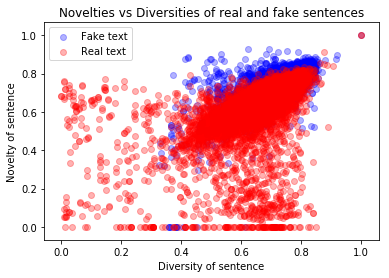

In [10]:
get_scatter_plot(wmd_normed_fake_diversities, wmd_normed_fake_novelties, wmd_normed_real_diversities, wmd_normed_real_novelties)

In [11]:
def stacked_hist(data, name):
    n_bins=500
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=1000
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

## Jaccard Novelty and Diversity

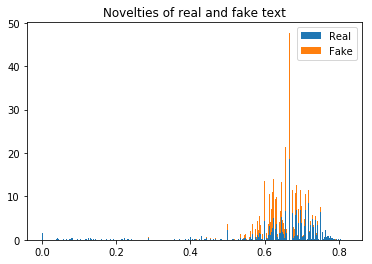

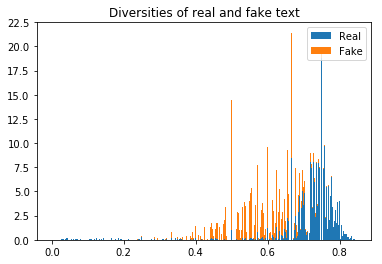

In [12]:
# Novelties of real and fake text using jaccard similarity metric
jac_novs = combine_real_fake(jac_real_novelties, jac_fake_novelties)
stacked_hist(jac_novs, "Novelties of real and fake text")

# Diversities of real and fake text using jaccard similarity metric
jac_divs = combine_real_fake(jac_real_diversities, jac_fake_diversities)
stacked_hist(jac_divs, "Diversities of real and fake text")

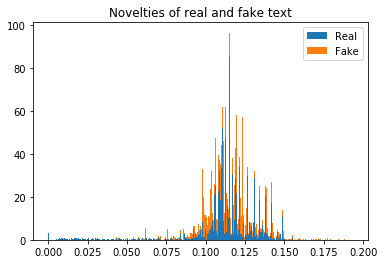

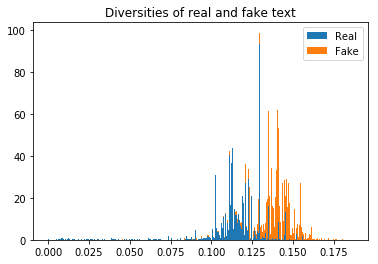

In [13]:
# Novelties of real and fake text using levenshtein metric
lev_novs = combine_real_fake(lev_normed_real_novelties, lev_normed_fake_novelties)
stacked_hist(lev_novs, "Novelties of real and fake text")

# Diversities of real and fake text using levenshtein metric
lev_divs = combine_real_fake(lev_normed_real_diversities, lev_normed_fake_diversities)
stacked_hist(lev_divs, "Diversities of real and fake text")

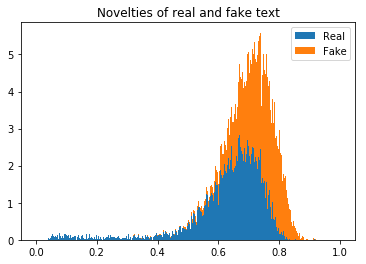

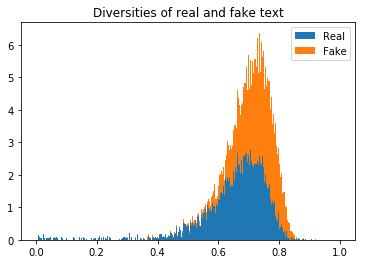

In [14]:
# Novelties of real and fake text using WMD metric
wmd_novs = combine_real_fake(wmd_normed_real_novelties, wmd_normed_fake_novelties)
stacked_hist(wmd_novs, "Novelties of real and fake text")

# Diversities of real and fake text using WMD metric
wmd_divs = combine_real_fake(wmd_normed_real_diversities, wmd_normed_fake_diversities)
stacked_hist(wmd_divs, "Diversities of real and fake text")

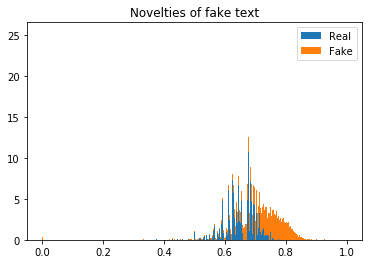

In [15]:
combined_fake_novelties = [jac_fake_novelties]
combined_fake_novelties.append(wmd_normed_fake_novelties)

stacked_hist(combined_fake_novelties,  "Novelties of fake text")

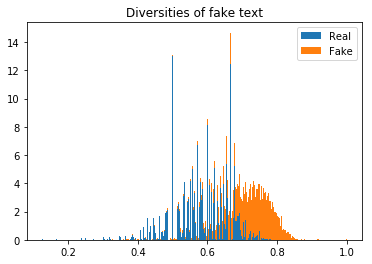

In [16]:
combined_fake_diversities = [jac_fake_diversities]
combined_fake_diversities.append(wmd_normed_fake_diversities)

stacked_hist(combined_fake_diversities,  "Diversities of fake text")

/Users/dc/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


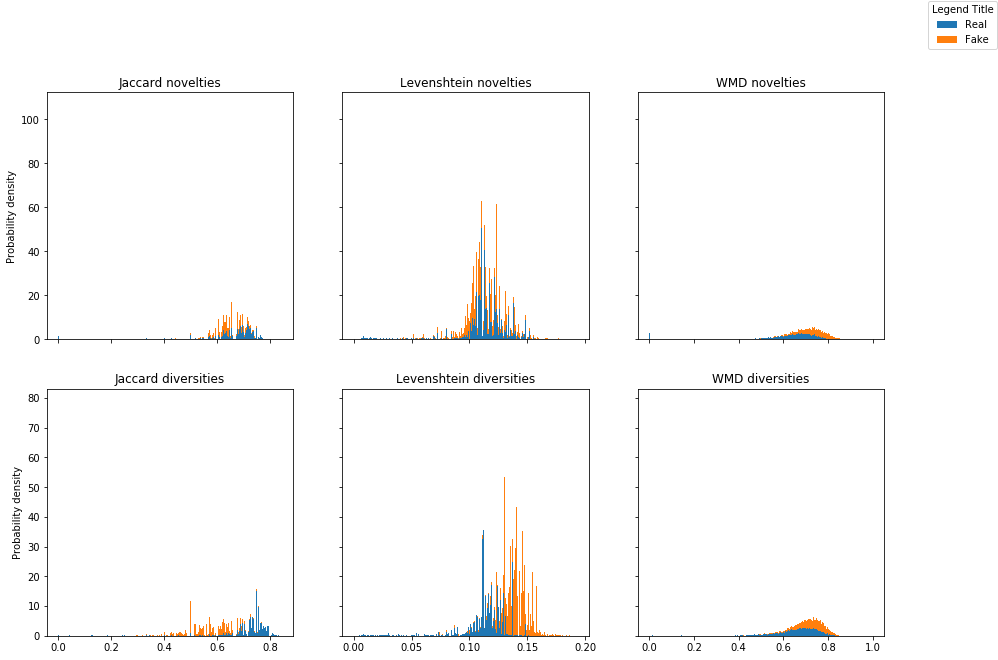

In [17]:
n_bins=400
colors = ["Real", "Fake"]
# plt.hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
# plt.legend(loc="upper right")

fig, axarr = plt.subplots(2, 3, sharex='col', sharey='row')

p1 = axarr[0, 0].hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 0].set_title('Jaccard novelties')
# axarr[0, 0].set_ylim(0,20)
p2 = axarr[0, 1].hist(lev_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 1].set_title('Levenshtein novelties')
p3 = axarr[0, 2].hist(wmd_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[0, 2].set_title('WMD novelties')
p4 = axarr[1, 0].hist(jac_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 0].set_title('Jaccard diversities')
# axarr[1,0].set_ylim(0,20)
p5 = axarr[1, 1].hist(lev_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 1].set_title('Levenshtein diversities')
p6 = axarr[1, 2].hist(wmd_divs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
axarr[1, 2].set_title('WMD diversities')

line_labels = colors
fig.legend([p1, p6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

fig.set_figheight(10)
fig.set_figwidth(15)

for ax in axarr.flat:
    ax.set(ylabel='Probability density')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()

/Users/dc/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


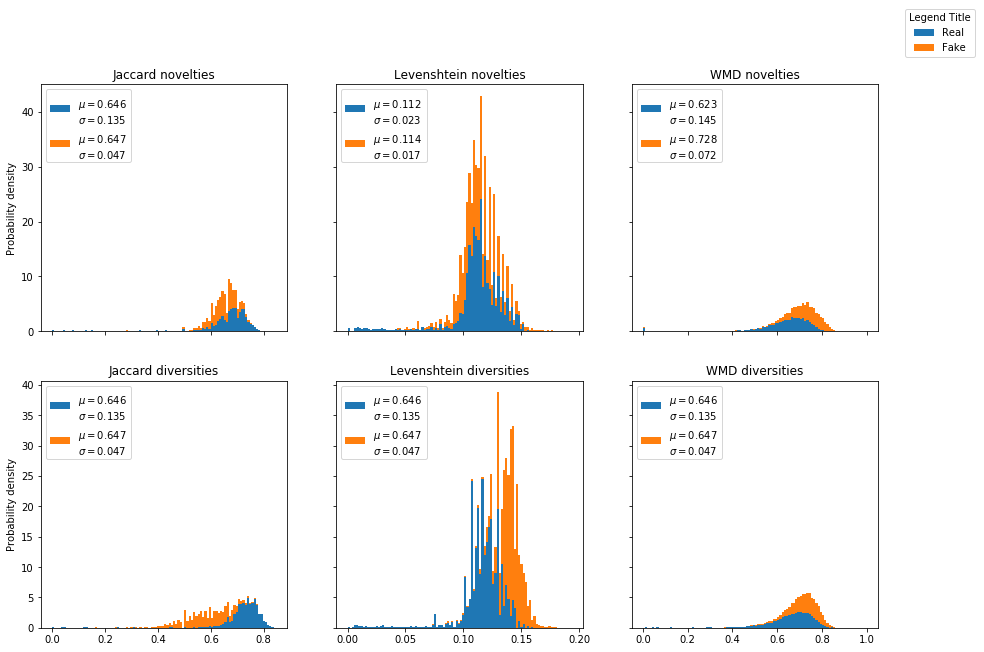

In [44]:
n_bins=100
colors = ["Real", "Fake"]
# plt.hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
# plt.legend(loc="upper right")

fig, axarr = plt.subplots(2, 3, sharex='col', sharey='row')

p1 = axarr[0, 0].hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_novelties), 3), round(np.nanstd(jac_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_novelties), 3), round(np.nanstd(jac_fake_novelties), 3))])
axarr[0, 0].legend(loc="upper left")
axarr[0, 0].set_title('Jaccard novelties')
p2 = axarr[0, 1].hist(lev_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_real_novelties), 3), round(np.nanstd(lev_normed_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_fake_novelties), 3), round(np.nanstd(lev_normed_fake_novelties), 3))])
axarr[0, 1].legend(loc="upper left")
axarr[0, 1].set_title('Levenshtein novelties')
p3 = axarr[0, 2].hist(wmd_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_real_novelties), 3), round(np.nanstd(wmd_normed_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_fake_novelties), 3), round(np.nanstd(wmd_normed_fake_novelties), 3))])
axarr[0, 2].legend(loc="upper left")
axarr[0, 2].set_title('WMD novelties')
p4 = axarr[1, 0].hist(jac_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_novelties), 3), round(np.nanstd(jac_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_novelties), 3), round(np.nanstd(jac_fake_novelties), 3))])
axarr[1, 0].legend(loc="upper left")
axarr[1, 0].set_title('Jaccard diversities')
p5 = axarr[1, 1].hist(lev_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_novelties), 3), round(np.nanstd(jac_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_novelties), 3), round(np.nanstd(jac_fake_novelties), 3))])
axarr[1, 1].legend(loc="upper left")
axarr[1, 1].set_title('Levenshtein diversities')
p6 = axarr[1, 2].hist(wmd_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_novelties), 3), round(np.nanstd(jac_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_novelties), 3), round(np.nanstd(jac_fake_novelties), 3))])
axarr[1, 2].legend(loc="upper left")
axarr[1, 2].set_title('WMD diversities')

line_labels = colors
fig.legend([p1, p6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.9,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

fig.set_figheight(10)
fig.set_figwidth(15)

for ax in axarr.flat:
    ax.set(ylabel='Probability density')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()

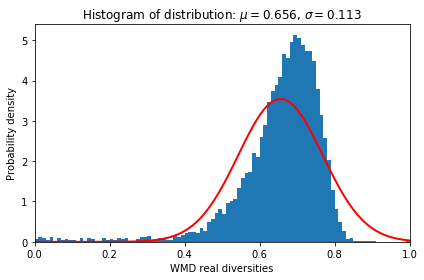

In [19]:
normal_distribution((wmd_normed_real_diversities), "WMD real diversities")

NameError: name 'reviews' is not defined

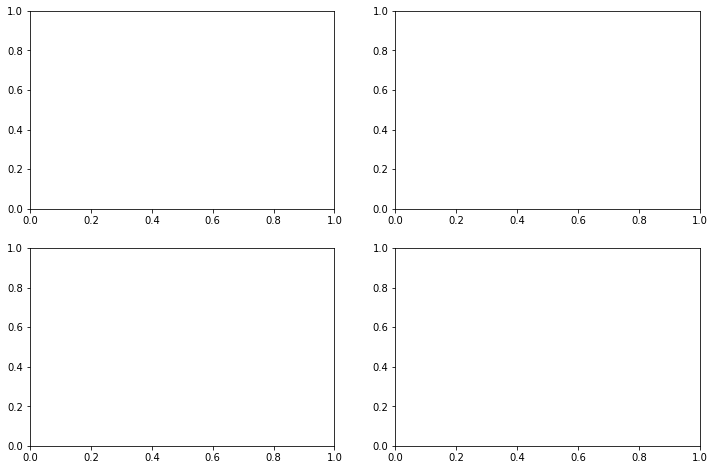

In [20]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine()